Quickstart 
===================================
In this notebook, we will explore `visual`, a companion package to `torchbearer` that enables complex feature visualisation with minimal work. 

We shall first show how easy it is to get a feature visualisation going using visual. 

In [1]:
!pip install -q torchbearer-visual

We import a couple things from visual and then print the layer names of squeezenet v1.1 so that we can decide which layer to ascend on. 

In [2]:
from visual.models import inception_v3
from visual import BasicAscent, Channel, image
from visual.transforms import RandomRotate, RandomScale, SpatialJitter, Compose
from visual.models.utils import IntermediateLayerGetter

return_layers = {'Mixed_5b': 'feat1'}
model = IntermediateLayerGetter(inception_v3(True, False), return_layers)
print(model.layer_names)

['Conv2d_1a_3x3', 'Conv2d_1a_3x3_conv', 'Conv2d_1a_3x3_bn', 'Conv2d_1a_3x3_relu', 'Conv2d_2a_3x3', 'Conv2d_2a_3x3_conv', 'Conv2d_2a_3x3_bn', 'Conv2d_2a_3x3_relu', 'Conv2d_2b_3x3', 'Conv2d_2b_3x3_conv', 'Conv2d_2b_3x3_bn', 'Conv2d_2b_3x3_relu', 'MaxPool2b', 'Conv2d_3b_1x1', 'Conv2d_3b_1x1_conv', 'Conv2d_3b_1x1_bn', 'Conv2d_3b_1x1_relu', 'Conv2d_4a_3x3', 'Conv2d_4a_3x3_conv', 'Conv2d_4a_3x3_bn', 'Conv2d_4a_3x3_relu', 'MaxPool4a', 'Mixed_5b', 'Mixed_5b_branch1x1', 'Mixed_5b_branch1x1_conv', 'Mixed_5b_branch1x1_bn', 'Mixed_5b_branch1x1_relu', 'Mixed_5b_branch5x5_1', 'Mixed_5b_branch5x5_1_conv', 'Mixed_5b_branch5x5_1_bn', 'Mixed_5b_branch5x5_1_relu', 'Mixed_5b_branch5x5_2', 'Mixed_5b_branch5x5_2_conv', 'Mixed_5b_branch5x5_2_bn', 'Mixed_5b_branch5x5_2_relu', 'Mixed_5b_branch3x3dbl_1', 'Mixed_5b_branch3x3dbl_1_conv', 'Mixed_5b_branch3x3dbl_1_bn', 'Mixed_5b_branch3x3dbl_1_relu', 'Mixed_5b_branch3x3dbl_2', 'Mixed_5b_branch3x3dbl_2_conv', 'Mixed_5b_branch3x3dbl_2_bn', 'Mixed_5b_branch3x3dbl_2_re

Let's choose the final layer, where we have 1000 channels, each corresponding to 1 imagenet class. We'll choose the 256th feature, which is the class "Newfoundland Dog". After running a `BasicAscent` and viewing it in pyplot, you can confirm for yourself that we indeed see things that look like dogs. 

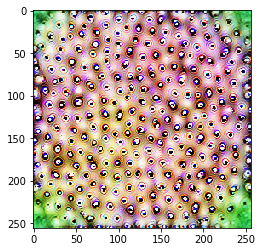

In [5]:
transforms = Compose([
    RandomRotate(list(range(-30, 30, 5))),
    RandomScale([0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2]),
])

crit = Channel(10, 'feat1')
img = image((3, 256, 256), transform=transforms, correlate=True, fft=True)


a = BasicAscent(img, crit, verbose=2).to_pyplot().run(model, device='cuda')

So, we have seen how quick it is to get a simple visualisation running, but what were did we actually do to get there? 

We'll now introduce, one at a time, the abstractions that visual uses:
- Images
- Transforms
- Criterions
- Ascenders
- Models
